# Candelstick Plot

In [7]:
import yfinance as yf

def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]
    df.columns = outer
    return df

def tweak_data():
    raw = yf.download('SPY AAPL', start='2010-01-01', end= '2023-06-30')

    return(raw
           .iloc[:, ::2]
           .pipe(fix_cols)
    )

raw = tweak_data()


[*********************100%***********************]  2 of 2 completed


,Open,High,Low,Close
Date,,,,
2018-01-01,NaN,NaN,NaN,NaN
2018-01-02,42.540001,43.075001,42.314999,43.064999
2018-01-03,43.132500,43.637501,42.990002,43.057499
2018-01-04,43.134998,43.367500,43.020000,43.257500
2018-01-05,43.360001,43.842499,43.262501,43.750000
...,...,...,...,...
2018-06-26,45.747501,46.632500,45.634998,46.107498
2018-06-27,46.307499,46.820000,46.007500,46.040001
2018-06-28,46.025002,46.552502,45.950001,46.375000


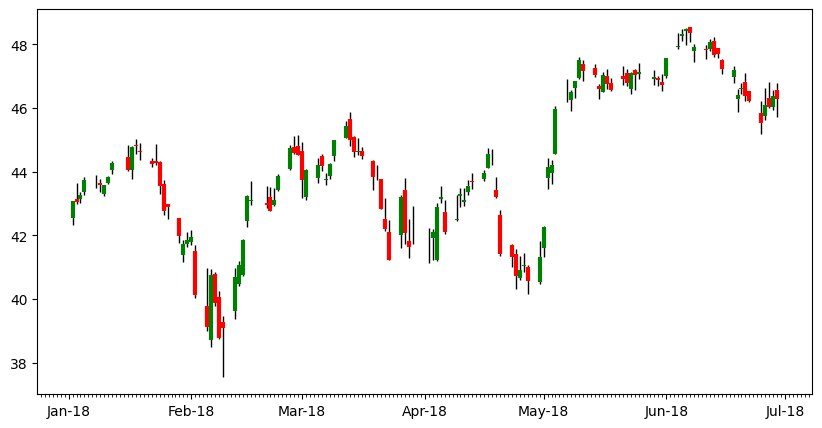

In [12]:
from matplotlib import dates
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

def plot_candle(df,ax):
    #wick
    ax.vlines(x=df.index, ymin=df.Low, ymax=df.High, colors='k', linewidth=1)
    #red - decrease
    red = df.query('Open > Close') #this creates a new dataframe where Open > Close
    ax.vlines(x=red.index, ymin=red.Close, ymax=red.Open, colors='r', linewidth=3)
    #green - increase
    green = df.query('Open <= Close') #this creates a new dataframe where Open <= Close
    ax.vlines(x=green.index, ymin=green.Close, ymax=green.Open, colors='g', linewidth=3)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y')) #%b-%y will put month followed by year
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return df

(raw
 .resample('d') #this is already in day
 .agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last'})
 #if resampling is done in month, the Open is the first price of the month
 .loc['jan 2018': 'jun 2018']
 .pipe(plot_candle, ax)
 )